# 🔬 Tests KPIs and metrics for different assets 🔬

### 🎯 0.0 Key goal 🎯
"**Goal Statement:** This sheet has the objective to import data with yfinance based on a predescribed list of financial assets with their corresponding predetermined characteristics and make different analysis about their porfolio. "
   

### 📋 0.1 Define the asset list and characteristics 📋

In [ ]:
Asset_List = ["AAPL", "GOOGL", "AMZN", "MSFT", "TSLA", "NFLX", "NVDA", "V", "QQQ", "SPY"]
start = "2010-01-01"
end = "2024-12-31"
frequency = "1d"

day_bought = "2019-12-02"

### 💰 0.2 Define the amount invested in each asset 💰
Specify the amount (in USD) invested in each asset using a dictionary.
You can now use the <code>Asset_Amounts</code> dictionary to access the amount invested in each asset for further calculations, such as computing portfolio weights or total value.

In [ ]:
# Define the amount invested in each asset
Asset_Amounts = {
    "AAPL": 30000,
    "GOOGL": 3000,
    "AMZN": 4000,
    "MSFT": 3500,
    "TSLA": 2500,
    "NFLX": 2000,
    "NVDA": 4500,
    "V": 3000,
    "QQQ": 0,
    "SPY": 0
}

# Define the amount invested in each asset
OptimizedPortfolio = {
    "AAPL": 1500,
    "GOOGL": 3000,
    "AMZN": 4000,
    "MSFT": 3500,
    "TSLA": 50000,
    "NFLX": 2000,
    "NVDA": 4500,
    "V": 50000,
    "QQQ": 0,
    "SPY": 5000
}



### 📅 0.3 Select the date range for the analysis 📅

In [ ]:
Analysis_from = '2019-12-02'

### 📥 0.4 Import necessary data 📥

Add data from 2010 and after, subsequent data addition or shrinking will be done with other variables

In [ ]:
import yfinance as yf
import pandas as pd

def get_asset_data(asset_list, start, end, frequency):
    """
    Fetches historical data for a list of assets and combines them into a single DataFrame.
    
    Parameters:
    asset_list (list): List of ticker symbols.
    start (str): Start date for the data.
    end (str): End date for the data.
    frequency (str): Data frequency (e.g., "1d" for daily).
    
    Returns:
    DataFrame: Combined historical data with tickers as columns and dates as rows.
    """
    combined_data = pd.DataFrame()
    
    for asset in asset_list:
        try:
            # Download data for the current asset
            data = yf.download(asset, start=start, end=end, interval=frequency)['Close']
            # Add the data to the combined DataFrame
            combined_data[asset] = data
        except Exception as e:
            print(f"Error fetching data for {asset}: {e}")
    
    return combined_data

# Fetch and display the combined data
data = get_asset_data(Asset_List, start, end, frequency)
print(data.head())
#print(data.columns)
#data.to_csv("Asset_Data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                AAPL      GOOGL    AMZN       MSFT  TSLA      NFLX      NVDA  \
Date                                                                           
2010-01-04  6.431897  15.609804  6.6950  23.211439   NaN  7.640000  0.423884   
2010-01-05  6.443017  15.541063  6.7345  23.218943   NaN  7.358571  0.430073   
2010-01-06  6.340532  15.149293  6.6125  23.076454   NaN  7.617143  0.432824   
2010-01-07  6.328811  14.796625  6.5000  22.836460   NaN  7.485714  0.424342   
2010-01-08  6.370887  14.993881  6.6760  22.993950   NaN  7.614286  0.425259   

                    V        QQQ        SPY  
Date                                         
2010-01-04  19.719208  40.485832  85.768425  
2010-01-05  19.493248  40.485832  85.995491  
2010-01-06  19.231478  40.241589  86.056038  
2010-01-07  19.410458  40.267773  86.419273  
2010-01-08  19.464159  40.599178  86.706886  


### ✂️ 0.5 Divide the data set ✂️  
Integrating only the dates wanted from the variable `Analysis_from` set in the **0.3 Section**. 

In [ ]:

data.index = pd.to_datetime(data.index)  # Ensure index is datetime
data_since_bought = data.loc[data.index >= Analysis_from]

# Drop columns with all NaNs (assets with no data in this period)
data_since_bought = data_since_bought.dropna(axis=1, how='all')

# Print debug info
# print("First 10 rows of data_since_bought:")
# print(data_since_bought.head(10))
# print("Index type:", type(data_since_bought.index))
# print("Number of rows:", len(data_since_bought))

returns_since_bought = data_since_bought.pct_change(fill_method=None).dropna()
print(returns_since_bought.head())

                AAPL     GOOGL      AMZN      MSFT      TSLA      NFLX  \
Date                                                                     
2019-12-03 -0.017830  0.004562 -0.006533 -0.001605  0.003972 -0.012355   
2019-12-04  0.008826  0.018691 -0.005237  0.003616 -0.009429 -0.006010   
2019-12-05  0.014671  0.006081 -0.011478  0.000534 -0.007987 -0.004798   
2019-12-06  0.019316  0.009367  0.006389  0.012139  0.016709  0.014825   
2019-12-09 -0.014000  0.002688 -0.001193 -0.002570  0.010837 -0.015780   

                NVDA         V       QQQ       SPY  
Date                                                
2019-12-03 -0.007598  0.000605 -0.007833 -0.006706  
2019-12-04  0.008475 -0.007147  0.005064  0.006170  
2019-12-05 -0.003247  0.007143  0.001976  0.001798  
2019-12-06  0.016432  0.001539  0.010699  0.009134  
2019-12-09  0.000000  0.004117 -0.004537 -0.003144  


### 📊 1.0 Up and Down Capture Ratio vs. QQQ 📊
In this section, we will analyze how our portfolio performs during up and down market days compared to the QQQ benchmark.The Up Capture Ratio shows how much of the QQQ's positive returns our portfolio captures during up days, while the Down Capture Ratio shows how much of the QQQ's negative returns our portfolio experiences during down days. Calculate daily returns for all assets and the benchmark (QQQ)

### Interpretation:
- An Up Capture Ratio above 100% means the portfolio outperformed QQQ on up days; below 100% means it underperformed.
- A Down Capture Ratio above 100% means the portfolio lost more than QQQ on down days; below 100% means it lost less (which is preferable).

'* Based on current weight of the portfolio

In [ ]:
# Calculate portfolio weights based on invested amounts
amounts = pd.Series(Asset_Amounts)
amountsOptimized = pd.Series(OptimizedPortfolio)
weights = amounts / amounts.sum()
weightsOptimized = amountsOptimized / amountsOptimized.sum()

# Calculate daily portfolio returns
portfolio_returns = returns_since_bought[weights.index].mul(weights, axis=1).sum(axis=1)
portfolio_returns_optimized = returns_since_bought[weightsOptimized.index].mul(weightsOptimized, axis=1).sum(axis=1)

# Get QQQ returns as benchmark
qqq_returns = returns_since_bought['QQQ']

# Identify up and down days for QQQ
up_days = qqq_returns > 0
down_days = qqq_returns < 0

# Calculate Up Capture Ratio
up_capture = (portfolio_returns[up_days].mean() / qqq_returns[up_days].mean()) * 100
up_captured_optimized = (portfolio_returns_optimized[up_days].mean() / qqq_returns[up_days].mean()) * 100

# Calculate Down Capture Ratio
down_capture = (portfolio_returns[down_days].mean() / qqq_returns[down_days].mean()) * 100
down_captured_optimized = (portfolio_returns_optimized[down_days].mean() / qqq_returns[down_days].mean()) * 100

print(f"Up Capture Ratio vs. QQQ: {up_capture:.2f}%")
print(f"Down Capture Ratio vs. QQQ: {down_capture:.2f}%")
print(f"Optimized Up Capture Ratio vs. QQQ: {up_captured_optimized:.2f}%")
print(f"Optimized Down Capture Ratio vs. QQQ: {down_captured_optimized:.2f}%")

Up Capture Ratio vs. QQQ: 114.93%
Down Capture Ratio vs. QQQ: 107.09%
Optimized Up Capture Ratio vs. QQQ: 122.21%
Optimized Down Capture Ratio vs. QQQ: 108.55%


### 📈 1.1 Create the visualization 📈

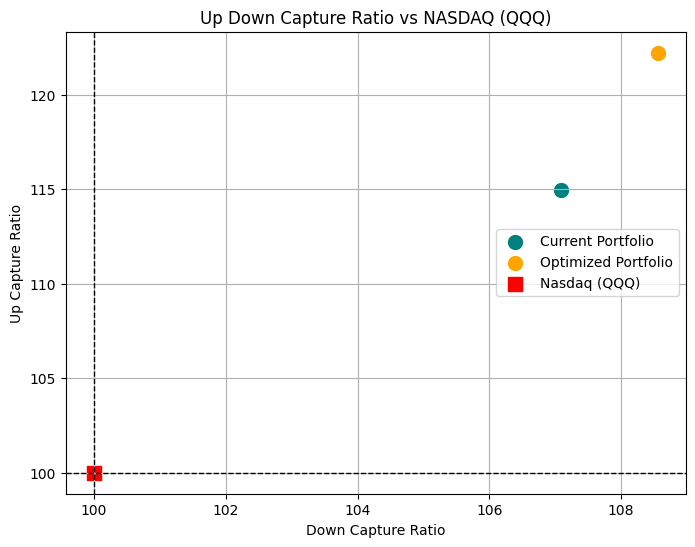

In [ ]:

import matplotlib.pyplot as plt

# Example values (replace with your actual calculations)
portfolio_up_capture = up_capture  # from your previous calculation
portfolio_down_capture = down_capture  # from your previous calculation

# Example MSCI values (replace with actual MSCI calculations if available)
QQQ_up_capture = 100  # By definition, the benchmark is 100%
QQQ_down_capture = 100

plt.figure(figsize=(8, 6))
plt.scatter(portfolio_down_capture, portfolio_up_capture, color='teal', s=100, label='Current Portfolio')
plt.scatter(down_captured_optimized, up_captured_optimized, color='orange', s=100, label='Optimized Portfolio')
plt.scatter(QQQ_down_capture, QQQ_up_capture, color='red', s=100, marker='s', label='Nasdaq (QQQ)')

# Draw crosshairs at 100%
plt.axhline(100, color='black', linestyle='--', linewidth=1)
plt.axvline(100, color='black', linestyle='--', linewidth=1)

plt.xlabel('Down Capture Ratio')
plt.ylabel('Up Capture Ratio')
plt.title('Up Down Capture Ratio vs NASDAQ (QQQ)')
plt.legend()
plt.grid(True)
plt.savefig("UpandDownRatio.png", bbox_inches="tight", dpi=300)
plt.show()


### 📉 2.0 Rolling Standard Deviation (Volatility) 📉

This section analyzes the 3-year rolling standard deviation of portfolio returns, which measures the historical volatility of the portfolio over time. A higher standard deviation indicates greater variability in returns (higher risk), while a lower standard deviation suggests more stable performance. Comparing the rolling standard deviation of the current and optimized portfolios helps assess the impact of portfolio adjustments on risk.

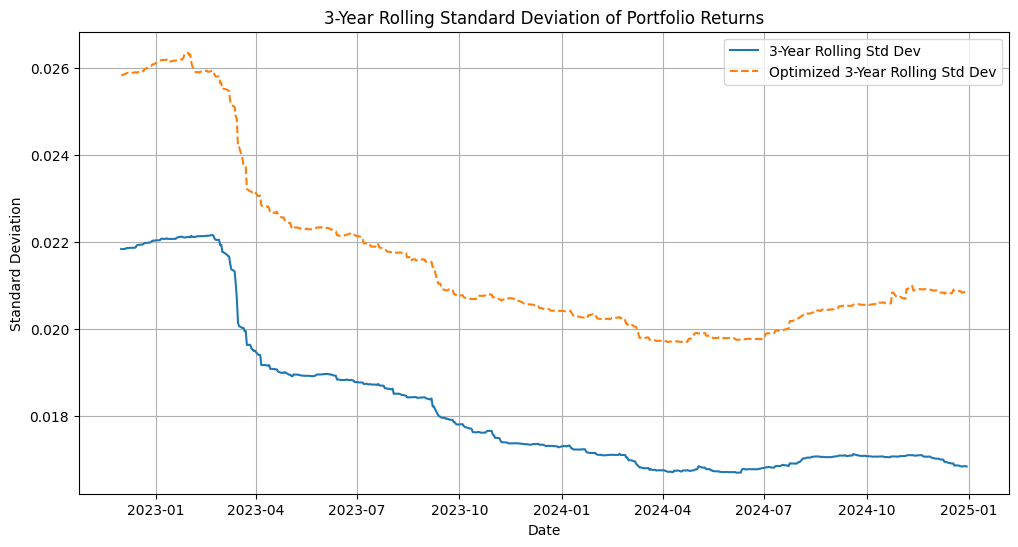

In [ ]:
window_size = 252 * 3

rolling_std = portfolio_returns.rolling(window=window_size).std()
optimized_rolling_std = portfolio_returns_optimized.rolling(window=window_size).std()

plt.figure(figsize=(12, 6))
plt.plot(rolling_std, label='3-Year Rolling Std Dev')
plt.plot(optimized_rolling_std, label='Optimized 3-Year Rolling Std Dev', linestyle='--')
plt.title('3-Year Rolling Standard Deviation of Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.savefig("Dev.png", bbox_inches="tight", dpi=300)
plt.show()

Maximum Drawdown: -35.84%
Maximum Drawdown Optimized: -43.57%


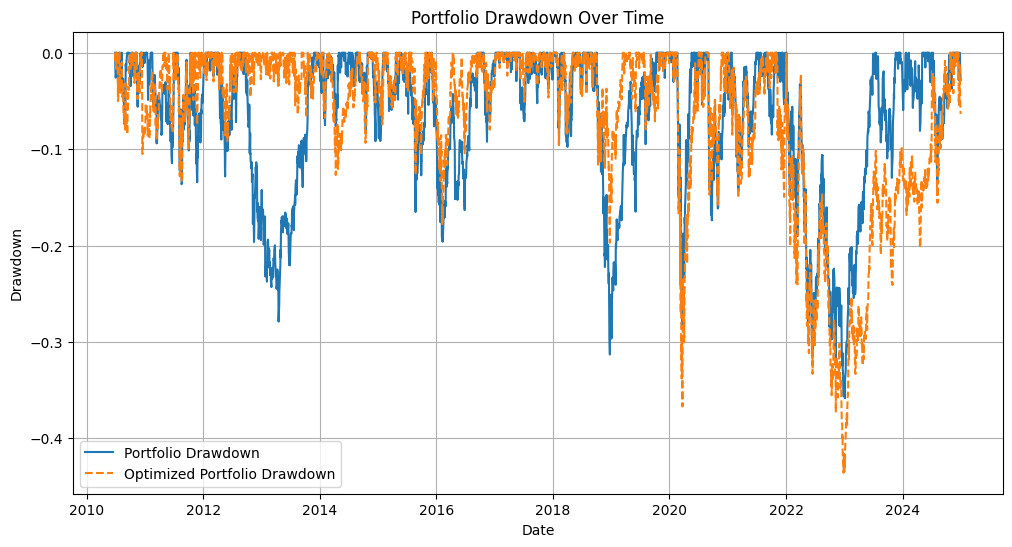

In [ ]:
# Calculate the number of shares for each asset based on the last trading day's price
last_trading_day = data.index[-1]
shares = {}
for asset, amount in Asset_Amounts.items():
    if amount > 0 and asset in data.columns:
        price_at_last = data.loc[last_trading_day, asset]
        shares[asset] = amount / price_at_last
    else:
        shares[asset] = 0

# Calculate the daily portfolio value over time based on constant shares
portfolio_value = pd.Series(0, index=data.index)
for asset, num_shares in shares.items():
    portfolio_value += data[asset] * num_shares

# Add portfolio value as a new column to the data
data['Portfolio_Value'] = portfolio_value

#############

shares_optimized = {}
for asset, amount in OptimizedPortfolio.items():
    if amount > 0 and asset in data.columns:
        price_at_last = data.loc[last_trading_day, asset]
        shares_optimized[asset] = amount / price_at_last
    else:
        shares_optimized[asset] = 0

#Calculate the daily portfolio value over time based on constant shares
portfolio_value_optimized = pd.Series(0, index=data.index)
for asset, num_shares_optimized in shares_optimized.items():
     portfolio_value_optimized += data[asset] * num_shares_optimized

###############
# Calculate cumulative max and drawdown
cumulative_max = portfolio_value.cummax()
drawdown = (portfolio_value - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()  # This will be a negative number (e.g., -0.25 for -25%)
print(f"Maximum Drawdown: {max_drawdown:.2%}")
##############
# Calculate cumulative max and drawdown
cumulative_max_optimized = portfolio_value_optimized.cummax()
drawdown_optimized = (portfolio_value_optimized - cumulative_max_optimized) / cumulative_max_optimized
max_drawdown_optimized = drawdown_optimized.min()  # This will be a negative number (e.g., -0.25 for -25%)
print(f"Maximum Drawdown Optimized: {max_drawdown_optimized:.2%}")


# Optional: Plot the drawdown over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(drawdown, label='Portfolio Drawdown')
plt.plot(drawdown_optimized, label='Optimized Portfolio Drawdown', linestyle='--')
plt.title('Portfolio Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.savefig("DrawdownLine.png", bbox_inches="tight", dpi=300)
plt.show()


### 📊 3.1 Maximum Drawdown by Year (Tabular View) 📊
This table summarizes the maximum drawdown for each calendar year and year-to-date (YTD) for both the current and optimized portfolios. This helps visualize and compare the worst peak-to-trough declines in each period, similar to professional portfolio reports.


Period  Current Portfolio  Optimized Portfolio
  2010          -7.349793           -10.504642
  2011         -13.643941           -13.451339
  2012         -19.634687            -9.177215
  2013         -15.923909            -6.718723
  2014          -9.175630           -12.691060
  2015         -16.523590           -12.642689
  2016         -12.587554           -13.700864
  2017          -7.117776            -5.097124
  2018         -31.308212           -19.708163
  2019         -13.891291            -7.950270
  2020         -28.288869           -36.696744
  2021         -14.381644           -15.074353
  2022         -35.651420           -43.520598
  2023         -12.982026           -15.508338
  2024         -13.265203           -13.759500


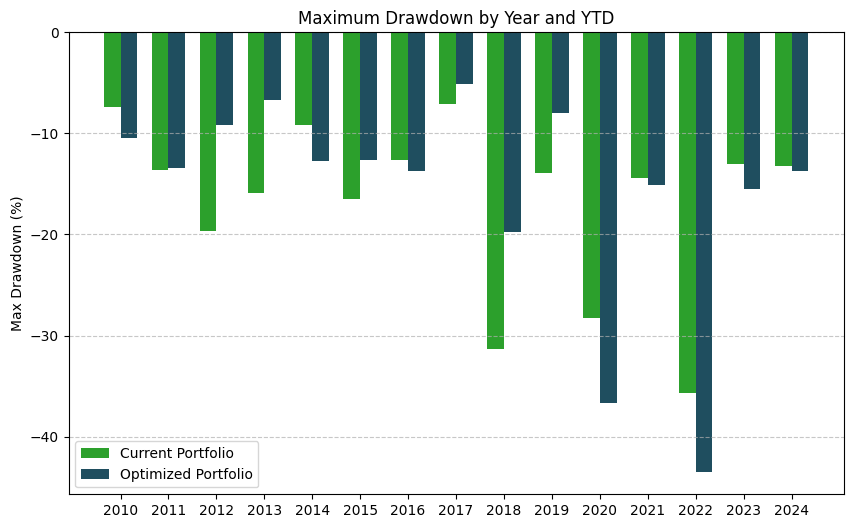

In [ ]:

# Helper function to calculate max drawdown for a given period
def max_drawdown_for_period(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return drawdown.min()

# Prepare a DataFrame to store results
drawdown_table = []

# Get years in the data (including YTD for the current year)
years = pd.to_datetime(portfolio_value.index).year.unique()
current_year = pd.Timestamp.now().year

for year in sorted(years):
    # For YTD, use data up to today if current year
    if year == current_year:
        mask = (portfolio_value.index.year == year) & (portfolio_value.index <= pd.Timestamp.now())
        label = "YTD"
    else:
        mask = portfolio_value.index.year == year
        label = str(year)
    if mask.sum() > 0:
        dd_current = max_drawdown_for_period(portfolio_value[mask])
        dd_optimized = max_drawdown_for_period(portfolio_value_optimized[mask])
        drawdown_table.append({
            "Period": label,
            "Current Portfolio": dd_current * 100,
            "Optimized Portfolio": dd_optimized * 100
        })

drawdown_df = pd.DataFrame(drawdown_table)

# Display as a table
print(drawdown_df.to_string(index=False))

# Optional: Bar plot for visual comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(drawdown_df))
plt.bar([i - bar_width/2 for i in x], drawdown_df["Current Portfolio"], width=bar_width, label="Current Portfolio", color="#2ca02c")
plt.bar([i + bar_width/2 for i in x], drawdown_df["Optimized Portfolio"], width=bar_width, label="Optimized Portfolio", color="#1f4e5f")
plt.xticks(x, drawdown_df["Period"])
plt.ylabel("Max Drawdown (%)")
plt.title("Maximum Drawdown by Year and YTD")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("DrawdownBar.png", bbox_inches="tight", dpi=300)
plt.show()


### 🔗 4.0 Correlation Matrix Analysis 🔗

The correlation matrix shows how the returns of each asset move relative to one another. A value close to 1 means two assets move together, while a value close to -1 means they move in opposite directions. Low or negative correlations between assets are desirable for diversification, as they can help reduce overall portfolio risk.

Below, we calculate and visualize the correlation matrices for both the current and optimized portfolios using heatmaps.

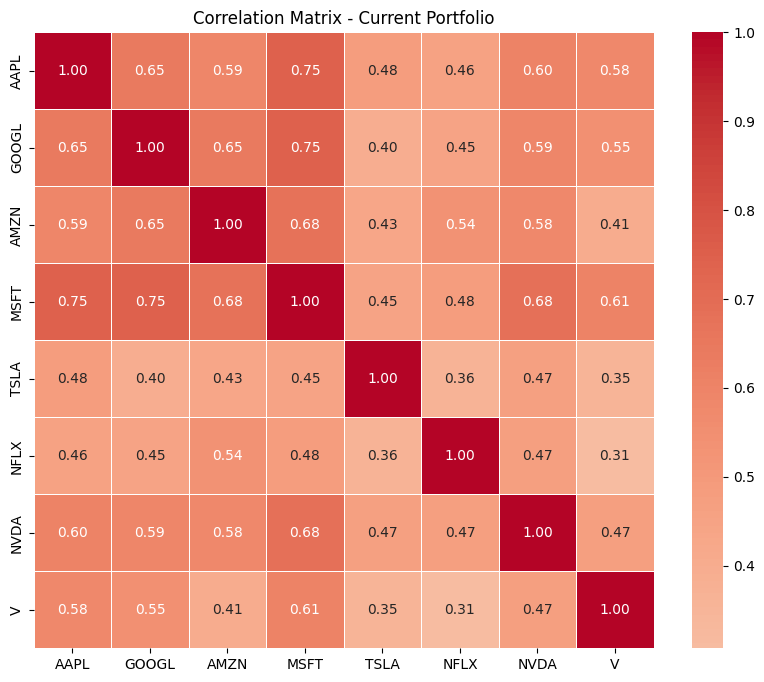

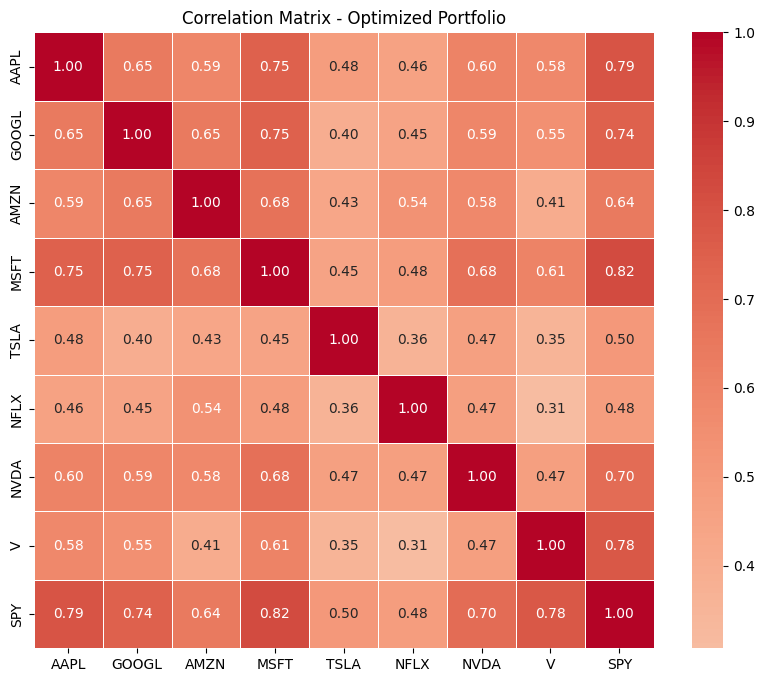

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the assets present in each portfolio (with nonzero weights)
current_assets = [asset for asset, amt in Asset_Amounts.items() if amt > 0 and asset in returns_since_bought.columns]
optimized_assets = [asset for asset, amt in OptimizedPortfolio.items() if amt > 0 and asset in returns_since_bought.columns]

# Correlation matrix for current portfolio
corr_current = returns_since_bought[current_assets].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_current, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Current Portfolio')
plt.savefig("CorrelationCurrent.png", bbox_inches="tight", dpi=300)
plt.show()

# Correlation matrix for optimized portfolio
corr_optimized = returns_since_bought[optimized_assets].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_optimized, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Optimized Portfolio')
plt.savefig("CorrelationOptimized.png", bbox_inches="tight", dpi=300)
plt.show()

### 🥧 5.0 Portfolio Allocation Pie Charts 🥧

The following pie charts visualize the allocation of each asset in both the current and optimized portfolios. This helps to quickly understand the diversification and concentration of holdings in each portfolio.

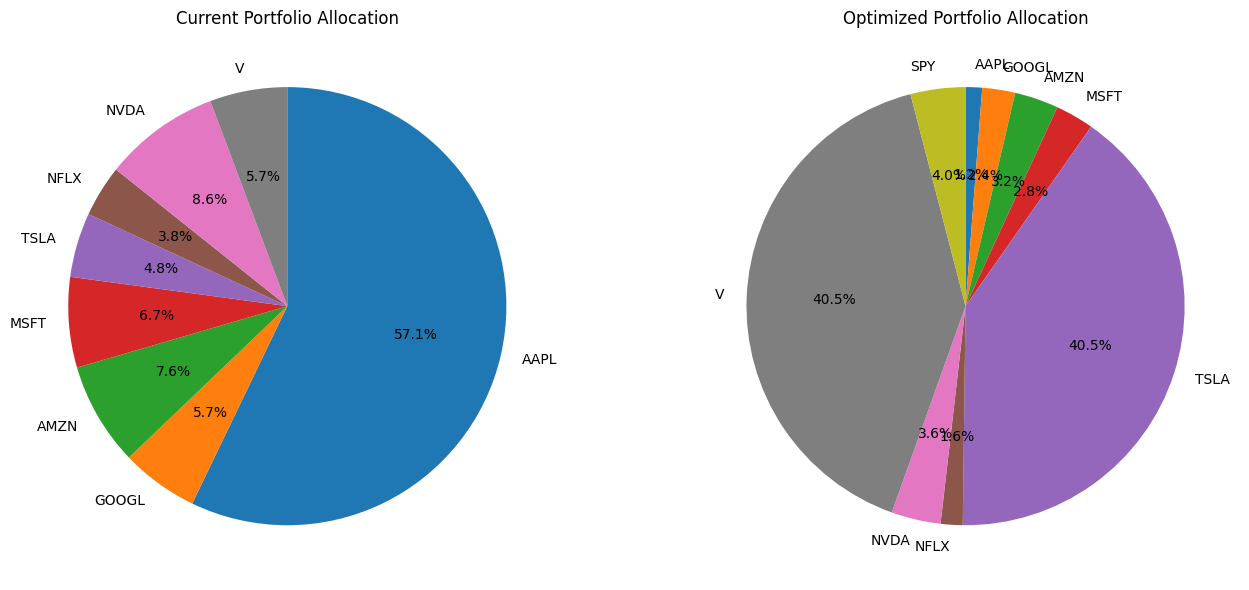

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for pie charts
current_alloc = pd.Series(Asset_Amounts)
current_alloc = current_alloc[current_alloc > 0]
optimized_alloc = pd.Series(OptimizedPortfolio)
optimized_alloc = optimized_alloc[optimized_alloc > 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Current Portfolio Pie Chart
axes[0].pie(current_alloc, labels=current_alloc.index, autopct='%1.1f%%', startangle=90, counterclock=False)
axes[0].set_title('Current Portfolio Allocation')

# Optimized Portfolio Pie Chart
axes[1].pie(optimized_alloc, labels=optimized_alloc.index, autopct='%1.1f%%', startangle=90, counterclock=False)
axes[1].set_title('Optimized Portfolio Allocation')

plt.tight_layout()
plt.savefig("PieCharts.png", bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
from PIL import Image
import os

# --- PAGE 1: Title Page ---
def pdf_page_1(pdf):
    fig, ax = plt.subplots(figsize=(11, 8.5))
    ax.axis('off')
    fig.suptitle('Portfolio Optimization of John Doe, January 2025', fontsize=24, fontweight='bold', y=0.7)
    ax.text(0.5, 0.5, 'Presented by IG Wealth, Edouard Zamman', fontsize=18, ha='center', va='center')
    pdf.savefig(fig)
    plt.close(fig)

# --- PAGE 2: Portfolio Allocations (with PNG) ---
def pdf_page_2(pdf, pie_png_path):
    fig, ax = plt.subplots(figsize=(11, 8.5))
    ax.axis('off')
    fig.suptitle('Current portfolio and optimized portfolio', fontsize=20, fontweight='bold', y=0.93)
    description = (
        'The following pie charts visualize the allocation of each asset in both the current and optimized portfolios.\n'
        'This helps to quickly understand the diversification and concentration of holdings in each portfolio.'
    )
    fig.text(0.5, 0.87, description, ha='center', va='top', fontsize=12, wrap=True)
    # Insert PNG
    if os.path.exists(pie_png_path):
        img = Image.open(pie_png_path)
        ax_img = fig.add_axes([0.15, 0.25, 0.7, 0.5])
        ax_img.imshow(img)
        ax_img.axis('off')
    else:
        fig.text(0.5, 0.5, f"Image not found: {pie_png_path}", ha='center', va='center', fontsize=14, color='red')
    pdf.savefig(fig)
    plt.close(fig)

# --- PAGE 3: Up and Down Capture (with PNG) ---
def pdf_page_3(pdf, updown_png_path):
    fig, ax = plt.subplots(figsize=(11, 8.5))
    ax.axis('off')
    fig.suptitle('Up and down capture', fontsize=20, fontweight='bold', y=0.93)
    description = (
        'In this section, we will analyze how our portfolio performs during up and down market days compared to the QQQ benchmark.\n'
        'The Up Capture Ratio shows how much of the QQQ\'s positive returns our portfolio captures during up days, while the Down Capture Ratio shows how much of the QQQ\'s negative returns our portfolio experiences during down days.'
    )
    fig.text(0.5, 0.87, description, ha='center', va='top', fontsize=12, wrap=True)
    # Insert PNG
    if os.path.exists(updown_png_path):
        img = Image.open(updown_png_path)
        ax_img = fig.add_axes([0.15, 0.25, 0.7, 0.5])
        ax_img.imshow(img)
        ax_img.axis('off')
    else:
        fig.text(0.5, 0.5, f"Image not found: {updown_png_path}", ha='center', va='center', fontsize=14, color='red')
    pdf.savefig(fig)
    plt.close(fig)

# --- PAGE 4: Correlation Information (side-by-side PNGs) ---
def pdf_page_4(pdf, corr_current_png, corr_optimized_png):
    fig, ax = plt.subplots(figsize=(11, 8.5))
    ax.axis('off')
    fig.suptitle('Correlation information', fontsize=20, fontweight='bold', y=0.93)
    description = (
        'The correlation matrix shows how the returns of each asset move relative to one another. A value close to 1 means two assets move together, while a value close to -1 means they move in opposite directions. '
        'Low or negative correlations between assets are desirable for diversification, as they can help reduce overall portfolio risk.'
    )
    fig.text(0.5, 0.87, description, ha='center', va='top', fontsize=12, wrap=True)
    # Insert two PNGs side by side
    if os.path.exists(corr_current_png) and os.path.exists(corr_optimized_png):
        img1 = Image.open(corr_current_png)
        img2 = Image.open(corr_optimized_png)
        ax_img1 = fig.add_axes([0.08, 0.25, 0.4, 0.6])
        ax_img1.imshow(img1)
        ax_img1.axis('off')
        ax_img2 = fig.add_axes([0.52, 0.25, 0.4, 0.6])
        ax_img2.imshow(img2)
        ax_img2.axis('off')
    else:
        fig.text(0.5, 0.5, f"Image not found: {corr_current_png} or {corr_optimized_png}", ha='center', va='center', fontsize=14, color='red')
    pdf.savefig(fig)
    plt.close(fig)

# --- PAGE 5: Standard Variation Analysis (Dev.png only) ---
def pdf_page_5(pdf, dev_png):
    fig, ax = plt.subplots(figsize=(11, 8.5))
    ax.axis('off')
    fig.suptitle('Standard variation analysis', fontsize=20, fontweight='bold', y=0.93)
    description = (
        'This section analyzes the 3-year rolling standard deviation of portfolio returns, which measures the historical volatility of the portfolio over time. '
        'A higher standard deviation indicates greater variability in returns (higher risk), while a lower standard deviation suggests more stable performance. '
        'Comparing the rolling standard deviation of the current and optimized portfolios helps assess the impact of portfolio adjustments on risk.'
    )
    fig.text(0.5, 0.87, description, ha='center', va='top', fontsize=12, wrap=True)
    # Insert Dev.png (centered, lower on page)
    if os.path.exists(dev_png):
        img1 = Image.open(dev_png)
        ax_img1 = fig.add_axes([0.12, 0.28, 0.76, 0.55])
        ax_img1.imshow(img1)
        ax_img1.axis('off')
    else:
        fig.text(0.5, 0.55, f"Image not found: {dev_png}", ha='center', va='center', fontsize=14, color='red')
    pdf.savefig(fig)
    plt.close(fig)

# --- PAGE 6: Drawdown Scenarios (lower both images) ---
def pdf_page_6(pdf, drawdownline_png, drawdownbar_png):
    # Set the overall page size here (width=11, height=8.5 inches)
    fig, ax = plt.subplots(figsize=(11, 8.5))
    ax.axis('off')
    fig.suptitle('Drawdown scenarios', fontsize=20, fontweight='bold', y=0.93)
    description = (
        'This table summarizes the maximum drawdown for each calendar year and year-to-date (YTD) for both the current and optimized portfolios. '
        'This helps visualize and compare the worst peak-to-trough declines in each period, similar to professional portfolio reports.'
    )
    fig.text(0.5, 0.87, description, ha='center', va='top', fontsize=12, wrap=True)
    # Set the size and position of the first image (drawdownline_png) here
    if os.path.exists(drawdownline_png):
        img1 = Image.open(drawdownline_png)
        ax_img1 = fig.add_axes([0.12, 0.5, 0.96, 0.35])  # [left, bottom, width, height]
        ax_img1.imshow(img1)
        ax_img1.axis('off')
    else:
        fig.text(0.5, 0.5, f"Image not found: {drawdownline_png}", ha='center', va='center', fontsize=14, color='red')
    # Set the size and position of the second image (drawdownbar_png) here
    if os.path.exists(drawdownbar_png):
        img2 = Image.open(drawdownbar_png)
        ax_img2 = fig.add_axes([0.12, 0.10, 0.96, 0.35])  # [left, bottom, width, height]
        ax_img2.imshow(img2)
        ax_img2.axis('off')
    else:
        fig.text(0.5, 0.2, f"Image not found: {drawdownbar_png}", ha='center', va='center', fontsize=14, color='red')
    pdf.savefig(fig)
    plt.close(fig)

# --- GENERATE PDF ---
pdf_filename = 'Portfolio_Optimization_John_Doe_Jan2025.pdf'
pie_png_path = 'PieCharts.png'  # Update if your file is named differently
updown_png_path = 'UpandDownRatio.png'  # Update if your file is named differently
corr_current_png = 'CorrelationCurrent.png'
corr_optimized_png = 'CorrelationOptimized.png'
dev_png = 'Dev.png'
drawdownbar_png = 'DrawdownBar.png'
drawdownline_png = 'DrawdownLine.png'

with PdfPages(pdf_filename) as pdf:
    pdf_page_1(pdf)
    pdf_page_2(pdf, pie_png_path)
    pdf_page_3(pdf, updown_png_path)
    pdf_page_4(pdf, corr_current_png, corr_optimized_png)
    pdf_page_5(pdf, dev_png)
    pdf_page_6(pdf, drawdownline_png, drawdownbar_png)

print(f"PDF report generated: {pdf_filename}")

PDF report generated: Portfolio_Optimization_John_Doe_Jan2025.pdf
